##Objective:   
- To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery

##Dataset Description:
- The dataset contains three different classes, including healthy, type 1 disease, and type 2 disease.
 
- Train folder: This folder has images for training the model, which is divided into subfolders having the same name as the class. 

- Test folder: This folder has images for testing the model, which is divided into subfolders having the same name as the class.

- Following operations should be performed using Keras or PyTorch or Torch vision-   
 - Import the necessary libraries
 - Plot the sample images for all the classes 
 - Plot the distribution of images across the classes
 - Build a data augmentation for train data to create  - new data with translation, rescale and flip, and  - rotation transformations. Rescale the image at 48x48

- Build a data augmentation for test data to create new data and rescale the image at 48x48

Read images directly from the train folder and test folder using the appropriate function

# LIbraries

In [1]:
import numpy as np
import os
import tensorflow as tf
#from tensorflow import keras
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
plt.rcParams.update({'font.size': 18})
import cv2
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from keras.applications import MobileNet
from sklearn.metrics import classification_report

%matplotlib inline

# Data

In [2]:
if os.path.exists("/content/drive/MyDrive/Colab Notebooks/Lung_Infection_Detection_Keras_CNN/data"):
    print('Dataset already Exist')
else:
    print('Data folder Does not exist')

Dataset already Exist


In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Lung_Infection_Detection_Keras_CNN/data"

In [4]:
os.listdir(data_path)

['test', 'train']

In [5]:
train_dir = os.path.join(data_path,os.listdir(data_path)[1])
test_dir = os.path.join(data_path,os.listdir(data_path)[0])

In [6]:
print(os.listdir(train_dir))

['Type 2 disease', 'Type 1 disease', 'Healthy']


In [7]:
print(os.listdir(test_dir))

['Type 1 disease', 'Type 2 disease', 'Healthy']


In [8]:
train_healthy = os.path.join(train_dir,'Healthy')
train_type1 = os.path.join(train_dir,'Type 1 disease')
train_type2 = os.path.join(train_dir,'Type 2 disease')

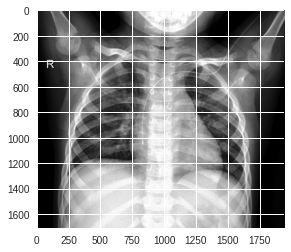

In [9]:
plt.imshow(plt.imread(os.path.join(train_healthy,'01.jpeg')))

In [10]:
cnt = 0
for dirname,_,filenames in os.walk(train_healthy):
  for filename in filenames:
    cnt = cnt + 1
print("No of Images in Train/Healthy Directory : {0}".format(cnt))

No of Images in Train/Healthy Directory : 70


In [11]:
cnt = 0
for dirname,_,filenames in os.walk(train_type1):
      for filename in filenames:
#           print(os.path.join(dirname,filename))
          cnt = cnt + 1
      print("No of Images in Train/Type 1 Disease Directory : {0}".format(cnt))

No of Images in Train/Type 1 Disease Directory : 111


In [12]:
cnt = 0
for dirname,_,filenames in os.walk(train_type2):
      for filename in filenames:
#           print(os.path.join(dirname,filename))
          cnt = cnt + 1
      print("No of Images in Train/Type 2 Disease Directory : {0}".format(cnt))

No of Images in Train/Type 2 Disease Directory : 70


In [13]:
test_healthy = os.path.join(test_dir,'Healthy')
test_type1 = os.path.join(test_dir,'Type 1 disease')
test_type2 = os.path.join(test_dir,'Type 2 disease')

In [14]:
cnt = 0
for dirname,_,filenames in os.walk(test_healthy):
      for filename in filenames:
#           print(os.path.join(dirname,filename))
          cnt = cnt + 1
      print("No of Images in Test/Healthy Directory : {0}".format(cnt))

No of Images in Test/Healthy Directory : 20


In [15]:
cnt = 0
for dirname,_,filenames in os.walk(test_type1):
      for filename in filenames:
#           print(os.path.join(dirname,filename))
          cnt = cnt + 1
      print("No of Images in Test/Type 1 Disease Directory : {0}".format(cnt))

No of Images in Test/Type 1 Disease Directory : 26


In [16]:
cnt = 0
for dirname,_,filenames in os.walk(test_type2):
      for filename in filenames:
#           print(os.path.join(dirname,filename))
          cnt = cnt + 1
      print("No of Images in Test/Type 2 Disease Directory : {0}".format(cnt))

No of Images in Test/Type 2 Disease Directory : 20


In [17]:
train_healthy

'/content/drive/MyDrive/Colab Notebooks/Lung_Infection_Detection_Keras_CNN/data/train/Healthy'

## Sample Images from Train/Healthy Diretory



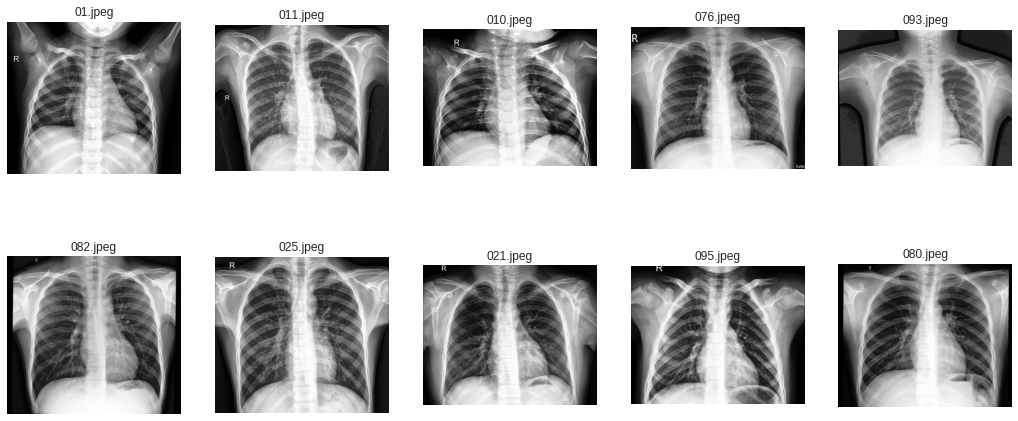

In [18]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(train_healthy):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(train_healthy,filename)))
        i+=1
        if i == 11:
          break

## Sample Images from Train/Type 1 Diesese Diretory



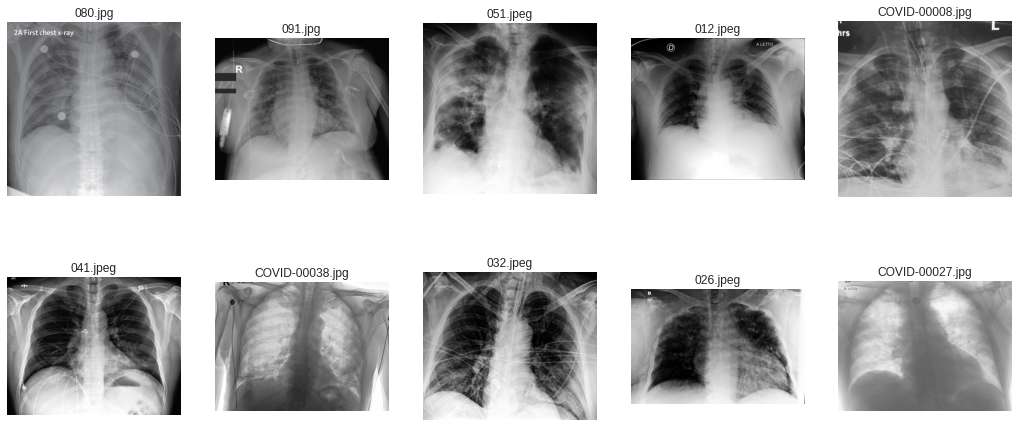

In [19]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(train_type1):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(train_type1,filename)))
        i+=1
        if i == 11:
          break

## Sample Images from Train/Type 2 Disease Diretory



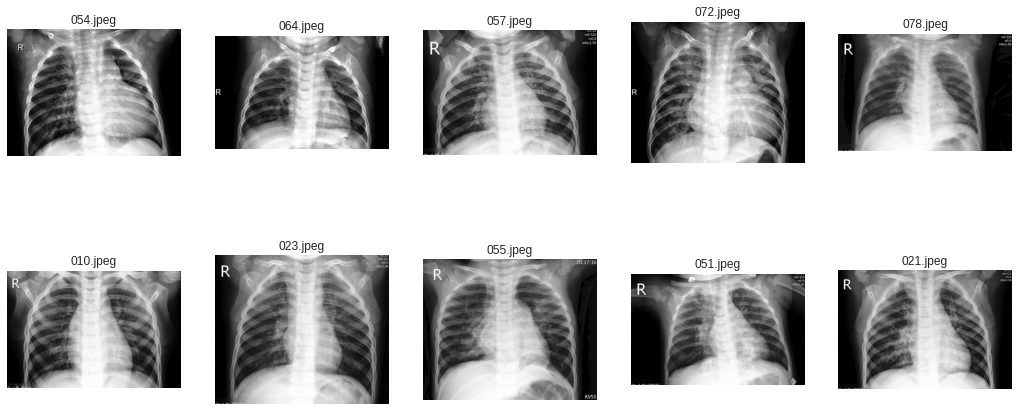

In [20]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(train_type2):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(train_type2,filename)))
        i+=1
        if i == 11:
          break

## Sample Images from Test/Healthy Diretory



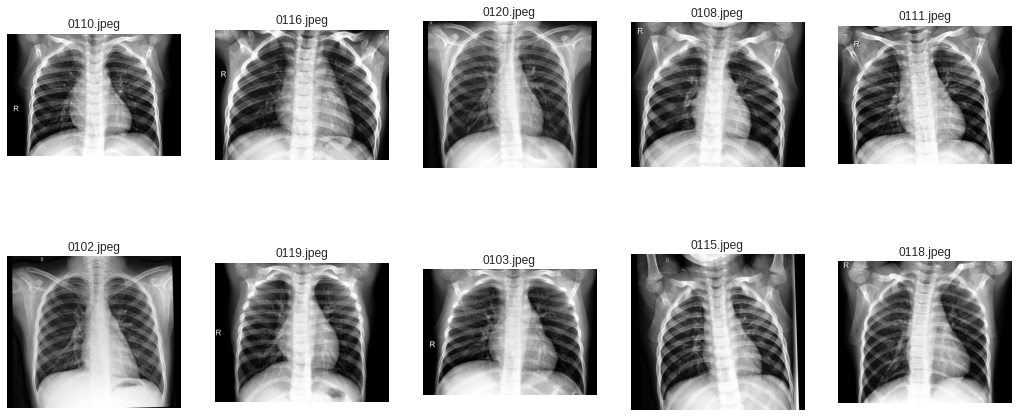

In [21]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(test_healthy):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(test_healthy,filename)))
        i+=1
        if i == 11:
          break

## Sample Images from Test/Type 1 Diesese Diretory



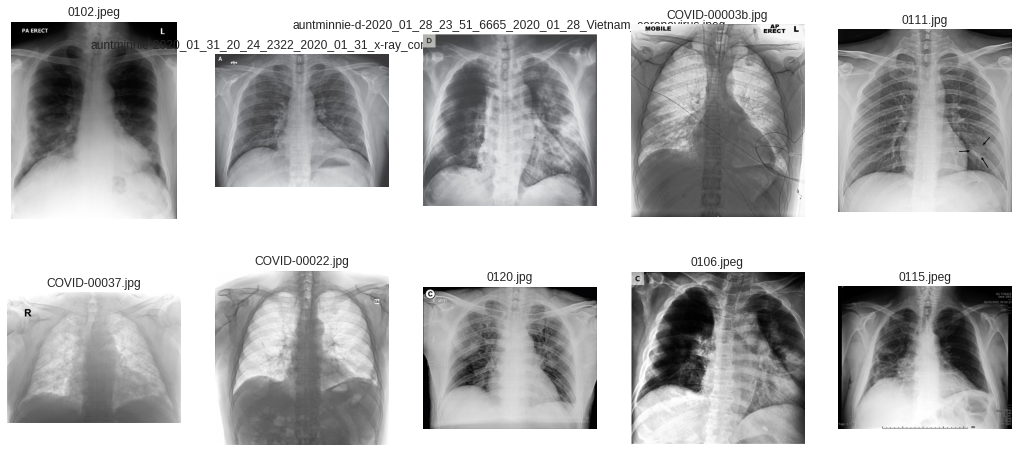

In [22]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(test_type1):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(test_type1,filename)))
        i+=1
        if i == 11:
          break

## Sample Images from Test/Type 2 Disease Diretory



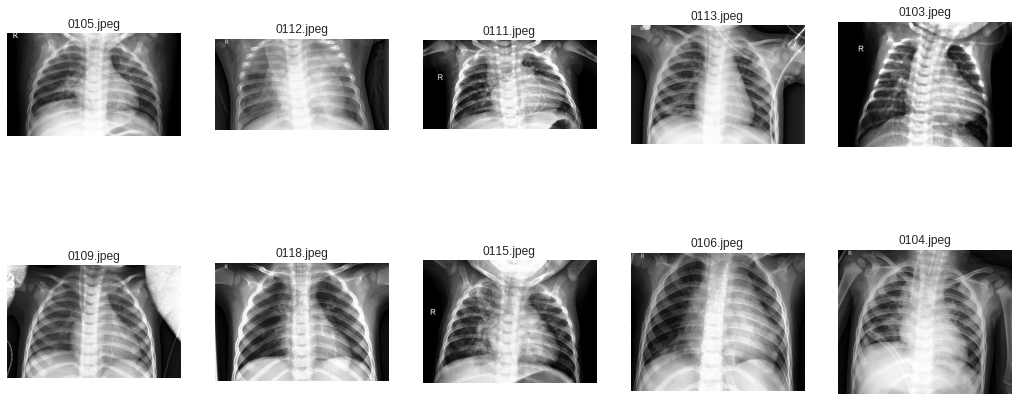

In [23]:
i = 1
plt.figure(figsize=(18,8))
for dirname,_,filenames in os.walk(test_type2):
      for filename in filenames:
        #print(filename)
        plt.subplot(2,5,i)
        plt.axis('off')
        plt.title(filename)
        plt.imshow(plt.imread(os.path.join(test_type2,filename)))
        i+=1
        if i == 11:
          break

# Create Train Dataset
Build a data augmentation for train data to create - new data with translation, rescale and flip, and - rotation transformations. Rescale the image at 48x48

In [24]:
IMG_WIDTH=48
IMG_HEIGHT=48

In [25]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB IMREAD_GRAYSCALE
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255.0
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name  # extract the image array and class name

In [26]:
train_dir

'/content/drive/MyDrive/Colab Notebooks/Lung_Infection_Detection_Keras_CNN/data/train'

In [27]:
X_train, y_train =create_dataset(train_dir)

In [28]:
set(y_train)

{'Healthy', 'Type 1 disease', 'Type 2 disease'}

In [29]:
target_dict={k: v for v, k in enumerate(np.unique(y_train))}
target_dict

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [30]:
target_val=  [target_dict[y_train[i]] for i in range(len(y_train))]
len(target_val)

251

In [31]:
X_train[i].shape[0],X_train[i].shape[1],3

(48, 48, 3)

In [32]:
for i in range(len(X_train)):
  if len(X_train[i].shape) !=3:
    #print(i,(X_train[i].shape))
    X_train[i].resize(X_train[i].shape[0],X_train[i].shape[1],3)

In [33]:
for i in range(len(X_train)):
  if len(X_train[i].shape) !=3:
    print(i,(X_train[i].shape))

In [34]:
X_train = np.array(X_train, np.float32)
y_train = np.array(list(map(int,target_val)), np.float32)

# Create Test Dataset

In [35]:
X_test, y_test = create_dataset(test_dir)

In [36]:
target_dict={k: v for v, k in enumerate(np.unique(y_test))}
target_dict

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [37]:
target_val_test =  [target_dict[y_test[i]] for i in range(len(y_test))]
len(target_val_test)

66

In [38]:
for i in range(len(X_test)):
  if len(X_test[i].shape) !=3:
    print(i,(X_test[i].shape))

3 (48, 48)
5 (48, 48)
6 (48, 48)
11 (48, 48)
25 (48, 48)


In [39]:
for i in range(len(X_test)):
  if len(X_test[i].shape) !=3:
    X_test[i].resize((X_test[i].shape[0],X_test[i].shape[1],3))
    print(i,(X_test[i].shape))

3 (48, 48, 3)
5 (48, 48, 3)
6 (48, 48, 3)
11 (48, 48, 3)
25 (48, 48, 3)


In [40]:
X_test = np.array(X_test, np.float32)
y_test = np.array(list(map(int,target_val_test)), np.float32)

# Create CNN Model

- CNN Architecture:
 - Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

 - Use Relu as an activation function
 - Take the loss function as categorical cross-entropy
 - Take rmsprop as an optimizer
 - Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
 - Try with ten numbers epoch
 - Train the model using a generator and test the accuracy of the test data at every epoch
 - Plot the training and validation accuracy, and the loss
 - Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [41]:
model=tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3,activation='softmax')])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train, epochs=5)

Epoch 1/5
8/8 [==============================] - 3s 12ms/step - loss: 1.0198 - accuracy: 0.4821
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.7769
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4316 - accuracy: 0.8287
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8884
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.8845


In [43]:
score = model.evaluate(X_train,y_train)

8/8 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.7849


In [44]:
score

[0.45486393570899963, 0.7848605513572693]

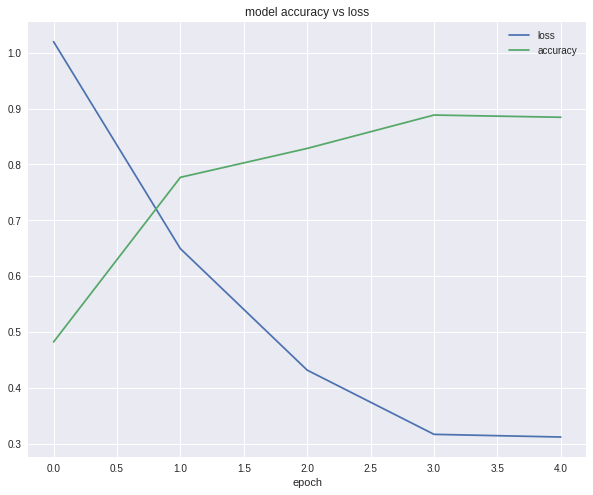

In [45]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

#### More epochs

In [46]:
history = model.fit(X_train,y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.9163
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9044
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 0.2119 - accuracy: 0.9163
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9283
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9402
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1951 - accuracy: 0.9243
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9442
Epoch 8/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9721
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9522
Epoch 10/20
8/8 [==============================] - 0s 4ms/step - loss: 0.1168 - accuracy: 0.9721
Epoch 11/20
8/8 [======================

In [47]:
score = model.evaluate(X_train,y_train)

8/8 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9721


In [48]:
score

[0.05855916813015938, 0.9721115827560425]

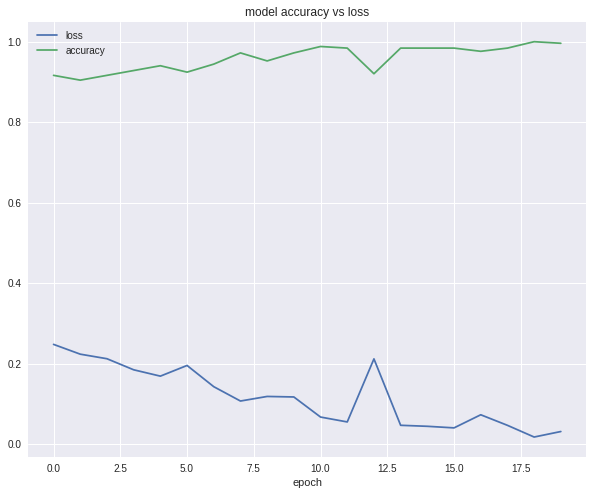

In [49]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

In [50]:
y_pred_cnn = model.predict(X_test, batch_size=7, verbose=1)
y_pred_bool_cnn = np.argmax(y_pred_cnn, axis=1)

print(classification_report(y_test, y_pred_bool_cnn))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.50      0.65        20
         1.0       0.96      0.92      0.94        26
         2.0       0.63      0.95      0.76        20

    accuracy                           0.80        66
   macro avg       0.83      0.79      0.78        66
weighted avg       0.85      0.80      0.80        66



#Transfer learning using mobile net
- Prepare data for the pre-trained mobile net model, with color mode as RGB
Create an instance of a mobile net pre-trained model 

- Add dense layer, dropout layer, batch normalization layer on the pre-trained model

- Create a final output layer with a SoftMax activation function

- Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases
- Take the loss function as categorical cross-entropy
- Use early stopping with the patience of two epoch and call back function for preventing overfitting
- Try with ten numbers epoch
- Train the model using a generator and test the accuracy of the test data at every epoch
- Plot the training and validation accuracy, and the loss
- Observe the precision, recall the F1-score for all classes for both grayscale
- and color models, and determine if the model’s classes are good

In [52]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path,cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB IMREAD_GRAYSCALE
            image=cv2.resize(image, (224, 224),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255.0
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name  # extract the image array and class name

#### Train Dataset for mobilenet

In [53]:
X_train, y_train =create_dataset(train_dir)

In [54]:
X_train[0].shape

(224, 224, 3)

In [55]:
target_dict={k: v for v, k in enumerate(np.unique(y_train))}
target_dict

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [56]:
target_val=  [target_dict[y_train[i]] for i in range(len(y_train))]
len(target_val)

251

In [57]:
for i in range(len(X_train)):
  if len(X_train[i].shape) !=3:
    #print(i,(X_train[i].shape))
    X_train[i].resize(X_train[i].shape[0],X_train[i].shape[1],3)

In [58]:
for i in range(len(X_train)):
  if len(X_train[i].shape) !=3:
    print(i,(X_train[i].shape))

In [59]:
X_train = np.array(X_train, np.float32)
y_train = np.array(list(map(int,target_val)), np.float32)

In [60]:
X_train.shape,y_train.shape

((251, 224, 224, 3), (251,))

#### Test Dataset for mobilenet

In [61]:
X_test, y_test = create_dataset(test_dir)

In [62]:
target_dict={k: v for v, k in enumerate(np.unique(y_test))}
target_dict

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [63]:
target_val_test =  [target_dict[y_test[i]] for i in range(len(y_test))]
len(target_val_test)

66

In [64]:
for i in range(len(X_test)):
  if len(X_test[i].shape) !=3:
    print(i,(X_test[i].shape))

3 (224, 224)
5 (224, 224)
6 (224, 224)
11 (224, 224)
25 (224, 224)


In [65]:
for i in range(len(X_test)):
  if len(X_test[i].shape) !=3:
    X_test[i].resize((X_test[i].shape[0],X_test[i].shape[1],3))
    print(i,(X_test[i].shape))

3 (224, 224, 3)
5 (224, 224, 3)
6 (224, 224, 3)
11 (224, 224, 3)
25 (224, 224, 3)


In [66]:
X_test = np.array(X_test, np.float32)
y_test = np.array(list(map(int,target_val_test)), np.float32)

In [67]:
img_rows, img_cols = 224, 224 

MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [68]:
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 ReLU True
4 DepthwiseConv2D True
5 BatchNormalization True
6 ReLU True
7 Conv2D True
8 BatchNormalization True
9 ReLU True
10 ZeroPadding2D True
11 DepthwiseConv2D True
12 BatchNormalization True
13 ReLU True
14 Conv2D True
15 BatchNormalization True
16 ReLU True
17 DepthwiseConv2D True
18 BatchNormalization True
19 ReLU True
20 Conv2D True
21 BatchNormalization True
22 ReLU True
23 ZeroPadding2D True
24 DepthwiseConv2D True
25 BatchNormalization True
26 ReLU True
27 Conv2D True
28 BatchNormalization True
29 ReLU True
30 DepthwiseConv2D True
31 BatchNormalization True
32 ReLU True
33 Conv2D True
34 BatchNormalization True
35 ReLU True
36 ZeroPadding2D True
37 DepthwiseConv2D True
38 BatchNormalization True
39 ReLU True
40 Conv2D True
41 BatchNormalization True
42 ReLU True
43 DepthwiseConv2D True
44 BatchNormalization True
45 ReLU True
46 Conv2D True
47 BatchNormalization True
48 ReLU True
49 DepthwiseConv2D True
50 BatchNorma

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
#from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [70]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [71]:
num_classes = 3

FC_Head = lw(MobileNet, num_classes)
model_mnet = Model(inputs = MobileNet.input, outputs = FC_Head)

In [72]:
model_mnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [73]:
model_mnet.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [74]:
history = model_mnet.fit(X_train,y_train, epochs=5)

Epoch 1/5
8/8 [==============================] - 9s 293ms/step - loss: 5.6645 - accuracy: 0.5737
Epoch 2/5
8/8 [==============================] - 1s 184ms/step - loss: 0.1405 - accuracy: 0.9482
Epoch 3/5
8/8 [==============================] - 1s 182ms/step - loss: 0.4221 - accuracy: 0.8645
Epoch 4/5
8/8 [==============================] - 1s 187ms/step - loss: 0.0291 - accuracy: 0.9920
Epoch 5/5
8/8 [==============================] - 1s 185ms/step - loss: 0.1069 - accuracy: 0.9641


In [75]:
score = model_mnet.evaluate(X_train,y_train)

8/8 [==============================] - 1s 42ms/step - loss: 0.7451 - accuracy: 0.8167


In [76]:
score

[0.7451469302177429, 0.8167330622673035]

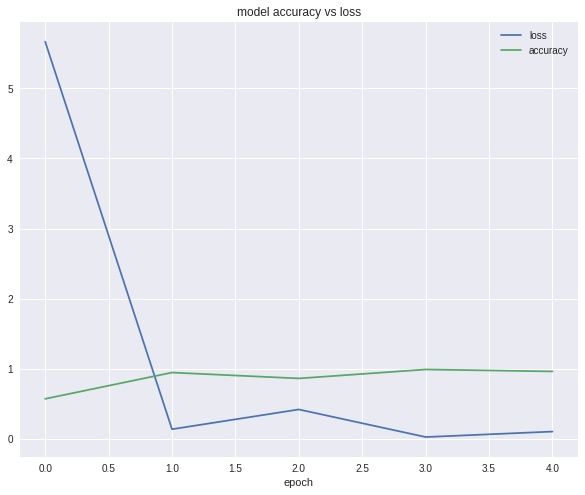

In [77]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

#### More epochs

In [78]:
history = model_mnet.fit(X_train,y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 1s 182ms/step - loss: 0.2636 - accuracy: 0.9402
Epoch 2/20
8/8 [==============================] - 1s 184ms/step - loss: 0.0089 - accuracy: 0.9960
Epoch 3/20
8/8 [==============================] - 2s 187ms/step - loss: 0.0651 - accuracy: 0.9841
Epoch 4/20
8/8 [==============================] - 1s 184ms/step - loss: 0.6542 - accuracy: 0.9203
Epoch 5/20
8/8 [==============================] - 1s 179ms/step - loss: 0.0824 - accuracy: 0.9721
Epoch 6/20
8/8 [==============================] - 2s 191ms/step - loss: 0.0330 - accuracy: 0.9880
Epoch 7/20
8/8 [==============================] - 2s 195ms/step - loss: 0.0792 - accuracy: 0.9721
Epoch 8/20
8/8 [==============================] - 2s 186ms/step - loss: 0.4094 - accuracy: 0.9482
Epoch 9/20
8/8 [==============================] - 1s 185ms/step - loss: 0.0947 - accuracy: 0.9801
Epoch 10/20
8/8 [==============================] - 1s 185ms/step - loss: 5.7948e-05 - accuracy: 1.0000
Epoch 11/20
8/8

In [79]:
score = model_mnet.evaluate(X_train,y_train)

8/8 [==============================] - 0s 38ms/step - loss: 1.1320 - accuracy: 0.8088


In [80]:
score

[1.1319552659988403, 0.8087649345397949]

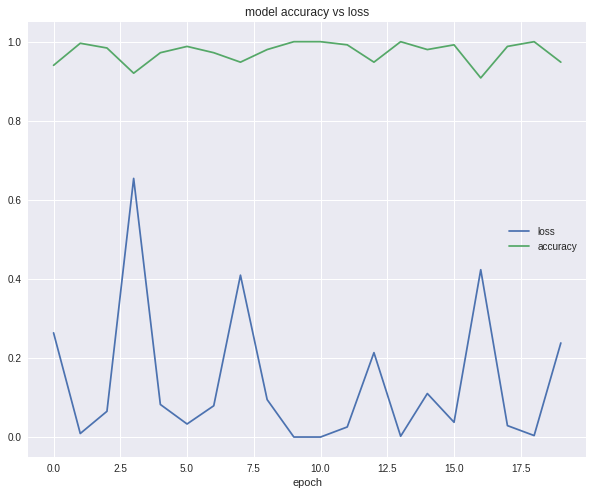

In [81]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

In [82]:
y_pred_mnet = model_mnet.predict(X_test, batch_size=7, verbose=1)
y_pred_bool_mnet = np.argmax(y_pred_mnet, axis=1)

print(classification_report(y_test, y_pred_bool_mnet))

10/10 [==============================] - 1s 30ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        20
         1.0       1.00      0.38      0.56        26
         2.0       0.51      1.00      0.68        20

    accuracy                           0.71        66
   macro avg       0.84      0.74      0.72        66
weighted avg       0.85      0.71      0.70        66



### Transfer Learning using Densenet121:
- Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3
- Freeze the top layers of the pre-trained model
- Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy
- Add the final output layer with a SoftMax activation function
- Take loss function as categorical cross-entropy
- Take Adam as an optimizer
- Use early stopping to prevent overfitting
- Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results
- Train the model using the generator and test the accuracy of the test data at every epoch 
- Plot the training and validation accuracy, and the loss
- Observe the precision, recall the F1-score for all classes for both grayscale
- and color models, and determine if the model’s classes are good

In [83]:
from keras.applications import DenseNet121

In [84]:
img_rows, img_cols = 224, 224 

DenseNet121 = DenseNet121(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [85]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [86]:
num_classes = 3

FC_Head = lw(DenseNet121, num_classes)
model_dnet = Model(inputs = DenseNet121.input, outputs = FC_Head)

In [87]:
model_dnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [88]:
model_dnet.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [89]:
history = model_dnet.fit(X_train,y_train, epochs= 15,batch_size = 7)

Epoch 1/15
36/36 [==============================] - 21s 175ms/step - loss: 0.8017 - accuracy: 0.7251
Epoch 2/15
36/36 [==============================] - 5s 150ms/step - loss: 0.5864 - accuracy: 0.8008
Epoch 3/15
36/36 [==============================] - 5s 130ms/step - loss: 0.4682 - accuracy: 0.8486
Epoch 4/15
36/36 [==============================] - 4s 114ms/step - loss: 0.4976 - accuracy: 0.8167
Epoch 5/15
36/36 [==============================] - 4s 108ms/step - loss: 0.3945 - accuracy: 0.8606
Epoch 6/15
36/36 [==============================] - 3s 95ms/step - loss: 0.4197 - accuracy: 0.8845
Epoch 7/15
36/36 [==============================] - 3s 91ms/step - loss: 0.2966 - accuracy: 0.9084
Epoch 8/15
36/36 [==============================] - 3s 92ms/step - loss: 0.3728 - accuracy: 0.8486
Epoch 9/15
36/36 [==============================] - 3s 92ms/step - loss: 0.3161 - accuracy: 0.8884
Epoch 10/15
36/36 [==============================] - 3s 91ms/step - loss: 0.3463 - accuracy: 0.8845
Epo

In [90]:
score = model_dnet.evaluate(X_train,y_train)

8/8 [==============================] - 5s 281ms/step - loss: 0.2015 - accuracy: 0.9363


In [91]:
score

[0.20149579644203186, 0.9362549781799316]

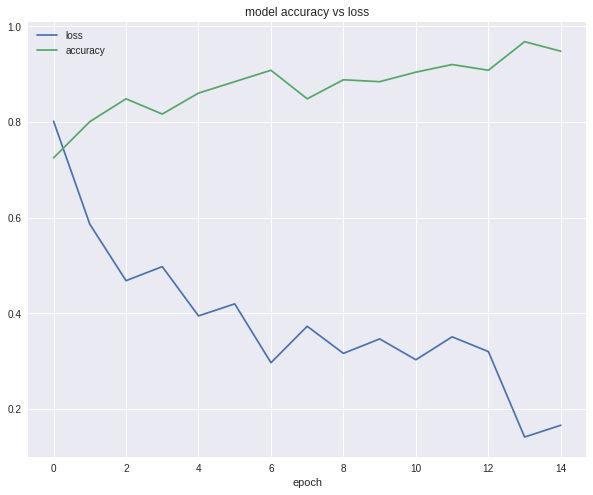

In [92]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

#### More epochs

In [93]:
history = model_dnet.fit(X_train,y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 7s 637ms/step - loss: 0.0633 - accuracy: 0.9880
Epoch 2/20
8/8 [==============================] - 3s 344ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 3s 345ms/step - loss: 0.0177 - accuracy: 0.9960
Epoch 4/20
8/8 [==============================] - 3s 343ms/step - loss: 0.0189 - accuracy: 0.9960
Epoch 5/20
8/8 [==============================] - 3s 345ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 6/20
8/8 [==============================] - 3s 344ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 3s 344ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/20
8/8 [==============================] - 3s 343ms/step - loss: 0.0076 - accuracy: 0.9960
Epoch 9/20
8/8 [==============================] - 3s 343ms/step - loss: 0.0113 - accuracy: 0.9920
Epoch 10/20
8/8 [==============================] - 3s 343ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 11/20
8/8 [==

In [94]:
score = model_dnet.evaluate(X_train,y_train)

8/8 [==============================] - 1s 98ms/step - loss: 0.0029 - accuracy: 1.0000


In [95]:
score

[0.0029268653597682714, 1.0]

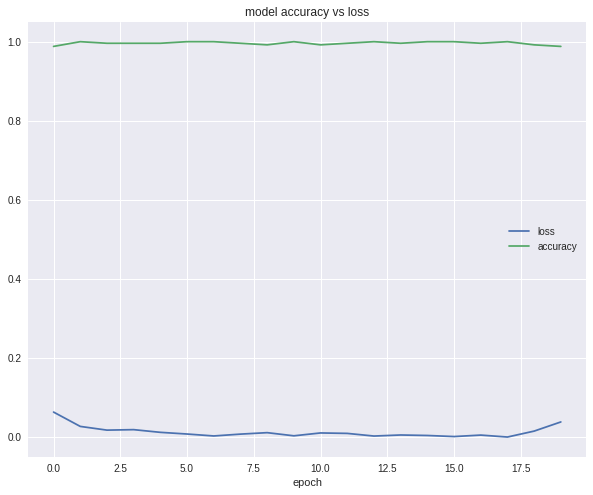

In [96]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.show()

In [99]:
y_pred_dnet = model_dnet.predict(X_test, batch_size=7, verbose=1)
y_pred_bool_dnet = np.argmax(y_pred_dnet, axis=1)

print(classification_report(y_test, y_pred_bool_dnet))

10/10 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      1.00      1.00        26
         2.0       1.00      0.95      0.97        20

    accuracy                           0.98        66
   macro avg       0.98      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



### Final step:   
- Compare all the models on the basis of accuracy, precision, recall, and f1-score

In [101]:
print(classification_report(y_test, y_pred_bool_cnn))

              precision    recall  f1-score   support

         0.0       0.91      0.50      0.65        20
         1.0       0.96      0.92      0.94        26
         2.0       0.63      0.95      0.76        20

    accuracy                           0.80        66
   macro avg       0.83      0.79      0.78        66
weighted avg       0.85      0.80      0.80        66



In [102]:
print(classification_report(y_test, y_pred_bool_mnet))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        20
         1.0       1.00      0.38      0.56        26
         2.0       0.51      1.00      0.68        20

    accuracy                           0.71        66
   macro avg       0.84      0.74      0.72        66
weighted avg       0.85      0.71      0.70        66



In [100]:
print(classification_report(y_test, y_pred_bool_dnet))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      1.00      1.00        26
         2.0       1.00      0.95      0.97        20

    accuracy                           0.98        66
   macro avg       0.98      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66

